## Process Yellowstone Data:

Now that the yellowstone mth5 has been created we can process the data with aurora

In [1]:
# Required imports for the program. 
import numpy as np
from pathlib import Path
import pandas as pd
import warnings

from mth5.clients.make_mth5 import MakeMTH5
from mth5 import mth5, timeseries
from mth5.utils.helpers import initialize_mth5
from mt_metadata.utils.mttime import get_now_utc, MTime
from aurora.config import BANDS_DEFAULT_FILE
from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from aurora.transfer_function.kernel_dataset import KernelDataset
from aurora.pipelines.run_summary import RunSummary

warnings.filterwarnings('ignore')

2022-10-16 13:18:00,532 [line 135] mth5.setup_logger - INFO: Logging file can be found /home/kkappler/software/irismt/mth5/logs/mth5_debug.log


## Set up the path to the file

The mth5 file is created via the example in notebooks/mth5

For now you can manually move the data here and then
mth5_path = Path(EM_WYYS2_MTF20_WYYS3_MTC20.h5")

Or you can path to the explicit location like this:
mth5_path = Path("/home/kkappler/software/irismt/mt_examples/notebooks/mth5").joinpath("EM_WYYS2_MTF20_WYYS3_MTC20.h5")

or you can use a symlink, or the inspect module

In this example I try using a relative path:

In [2]:
here = Path(".")
data_dir = here.joinpath("../../data/time_series")
data_dir = here.joinpath("../mth5")
mth5_path = data_dir.joinpath("EM_WYYS2_MTF20_WYYS3_MTC20.h5")

mth5_path.exists()

True

In [3]:
# Uncomment below for path troubleshooting

# list(data_dir.glob("*"))

## Initialize the mth5 and take a look at contents

In [4]:
mth5_object = initialize_mth5(mth5_path)

In [5]:
# Print some info about the mth5 
mth5_filename = mth5_object.filename
version = mth5_object.file_version
print(f" Filename: {mth5_filename} \n Version: {version}")

 Filename: ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5 
 Version: 0.2.0


In [6]:
mth5_object.channel_summary.clear_table()
channel_summary = mth5_object.channel_summary.summarize()
channel_summary_df = mth5_object.channel_summary.to_dataframe()

In [7]:
channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,ex,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,electric,12.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,ey,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,electric,102.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,hx,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,magnetic,12.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,hy,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,magnetic,102.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,hz,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,magnetic,0.0,90.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Kansas 2017 Long Period,WYYS3,004,44.561001,-110.315002,2387.7,ex,2009-09-09 21:01:11+00:00,2009-09-17 00:00:01+00:00,615530,1.0,electric,13.4,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
61,Kansas 2017 Long Period,WYYS3,004,44.561001,-110.315002,2387.7,ey,2009-09-09 21:01:11+00:00,2009-09-17 00:00:01+00:00,615530,1.0,electric,103.4,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
62,Kansas 2017 Long Period,WYYS3,004,44.561001,-110.315002,2387.7,hx,2009-09-09 21:01:11+00:00,2009-09-17 00:00:01+00:00,615530,1.0,magnetic,13.4,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
63,Kansas 2017 Long Period,WYYS3,004,44.561001,-110.315002,2387.7,hy,2009-09-09 21:01:11+00:00,2009-09-17 00:00:01+00:00,615530,1.0,magnetic,103.4,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


## To see the entire channel summary pretty printed use this:

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(channel_summary_df)

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,ex,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,electric,12.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,ey,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,electric,102.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,hx,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,magnetic,12.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,hy,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,magnetic,102.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,Kansas 2017 Long Period,MTC20,001,47.755001,-108.000000,834.4,hz,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,4222,1.0,magnetic,0.0,90.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,Kansas 2017 Long Period,MTC20,002,47.755001,-108.000000,834.4,ex,2009-08-23 01:33:26+00:00,2009-09-01 18:50:08+00:00,839802,1.0,electric,12.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,Kansas 2017 Long Period,MTC20,002,47.755001,-108.000000,834.4,ey,2009-08-23 01:33:26+00:00,2009-09-01 18:50:08+00:00,839802,1.0,electric,102.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,Kansas 2017 Long Period,MTC20,002,47.755001,-108.000000,834.4,hx,2009-08-23 01:33:26+00:00,2009-09-01 18:50:08+00:00,839802,1.0,magnetic,12.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,Kansas 2017 Long Period,MTC20,002,47.755001,-108.000000,834.4,hy,2009-08-23 01:33:26+00:00,2009-09-01 18:50:08+00:00,839802,1.0,magnetic,102.8,0.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,Kansas 2017 Long Period,MTC20,002,47.755001,-108.000000,834.4,hz,2009-08-23 01:33:26+00:00,2009-09-01 18:50:08+00:00,839802,1.0,magnetic,0.0,90.0,Digital Counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


##  Compress the Channel Summary to a RunSummary

In [9]:
mth5_run_summary = RunSummary()
mth5_run_summary.from_mth5s([mth5_path,])
run_summary = mth5_run_summary.clone()
run_summary.add_duration()

2022-10-16 13:18:04,272 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5


Now we have a dataframe of the available runs to process from the MTH5 

In [10]:
run_summary.df

,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,mth5_path,duration
0,Kansas 2017 Long Period,MTC20,001,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,4222.0
1,Kansas 2017 Long Period,MTC20,002,2009-08-23 01:33:26+00:00,2009-09-01 18:50:08+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,839802.0
2,Kansas 2017 Long Period,MTC20,003,2009-09-01 19:06:56+00:00,2009-09-13 00:00:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,967985.0
3,Kansas 2017 Long Period,MTF20,001,2009-07-03 22:38:13+00:00,2009-07-04 00:43:53+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,7540.0
4,Kansas 2017 Long Period,MTF20,002,2009-07-04 00:48:01+00:00,2009-07-31 19:39:02+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,2400661.0
5,Kansas 2017 Long Period,MTF20,003,2009-07-31 20:47:27+00:00,2009-08-13 00:00:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,1048354.0
6,Kansas 2017 Long Period,WYYS2,001,2009-07-15 22:43:28+00:00,2009-07-15 23:30:42+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,2834.0
7,Kansas 2017 Long Period,WYYS2,002,2009-07-15 23:39:07+00:00,2009-08-05 19:09:40+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,1798233.0
8,Kansas 2017 Long Period,WYYS2,003,2009-08-05 19:49:51+00:00,2009-08-20 00:17:07+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,1225636.0
9,Kansas 2017 Long Period,WYYS3,001,2009-08-20 01:55:41+00:00,2009-08-28 17:23:46+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,746885.0


### Here are the columns available in the run summary

In [11]:
run_summary.df.columns

Index(['survey', 'station_id', 'run_id', 'start', 'end', 'sample_rate',
       'input_channels', 'output_channels', 'channel_scale_factors',
       'mth5_path', 'duration'],
      dtype='object')

### Here are the columns to look at to get a sense of the data coverage

Sometimes we just want to look at the survey, station, run, and time intervals
we can for that we can call mini_summary


In [12]:
run_summary.mini_summary

,survey,station_id,run_id,start,end
0,Kansas 2017 Long Period,MTC20,001,2009-08-22 23:54:15+00:00,2009-08-23 01:04:37+00:00
1,Kansas 2017 Long Period,MTC20,002,2009-08-23 01:33:26+00:00,2009-09-01 18:50:08+00:00
2,Kansas 2017 Long Period,MTC20,003,2009-09-01 19:06:56+00:00,2009-09-13 00:00:01+00:00
3,Kansas 2017 Long Period,MTF20,001,2009-07-03 22:38:13+00:00,2009-07-04 00:43:53+00:00
4,Kansas 2017 Long Period,MTF20,002,2009-07-04 00:48:01+00:00,2009-07-31 19:39:02+00:00
5,Kansas 2017 Long Period,MTF20,003,2009-07-31 20:47:27+00:00,2009-08-13 00:00:01+00:00
6,Kansas 2017 Long Period,WYYS2,001,2009-07-15 22:43:28+00:00,2009-07-15 23:30:42+00:00
7,Kansas 2017 Long Period,WYYS2,002,2009-07-15 23:39:07+00:00,2009-08-05 19:09:40+00:00
8,Kansas 2017 Long Period,WYYS2,003,2009-08-05 19:49:51+00:00,2009-08-20 00:17:07+00:00
9,Kansas 2017 Long Period,WYYS3,001,2009-08-20 01:55:41+00:00,2009-08-28 17:23:46+00:00


It may be a good idea to add "duration" to the mini-summary as well.

## Kernel Dataset

This is like a run summary, but for a single station or a pair of stations.
It is used to specify the inputs to aurora processing.

It takes a run_summary and a station name, and optionally, a remote reference station name

It is made _based on the available data_.

Syntax is kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)

Here is an example of making a kernel dataset for a single station:

In [13]:
local_station_id = "WYYS2"

In [14]:
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,Kansas 2017 Long Period,WYYS2,001,2009-07-15 22:43:28+00:00,2009-07-15 23:30:42+00:00,2834.0
1,Kansas 2017 Long Period,WYYS2,002,2009-07-15 23:39:07+00:00,2009-08-05 19:09:40+00:00,1798233.0
2,Kansas 2017 Long Period,WYYS2,003,2009-08-05 19:49:51+00:00,2009-08-20 00:17:07+00:00,1225636.0


## Drop short runs before processing

This also may get moved into kernel_dataset tools and parameters in future.  For example, the processing config
could have a "_minimum run duration_" argument, but this will in general be based on the data sample rate.

For now we apply the dropping of runs manually

In [15]:
mimimum_run_duration= 3600 #seconds
kernel_dataset.drop_runs_shorter_than(mimimum_run_duration)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,Kansas 2017 Long Period,WYYS2,002,2009-07-15 23:39:07+00:00,2009-08-05 19:09:40+00:00,1798233.0
1,Kansas 2017 Long Period,WYYS2,003,2009-08-05 19:49:51+00:00,2009-08-20 00:17:07+00:00,1225636.0


In [16]:
print(f"There are {len(kernel_dataset.df)} long runs to process")
print("having durations:\n")
durations = kernel_dataset.df.duration.values
print(f"{durations} s.")
print(f"{np.round(durations/60)} min.")
print(f"{np.round(durations/3600)} hr.")
print(f"{np.round(durations/(3600*24))} days.")

There are 2 long runs to process
having durations:

[ 1798233.  1225636.] s.
[ 29971.  20427.] min.
[ 500.  340.] hr.
[ 21.  14.] days.


##  Given a KernelDataset, now set the processing parameters

Initialize a ConfigCreator

In [17]:
cc = ConfigCreator()

In [18]:
config = cc.create_from_kernel_dataset(kernel_dataset)

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


### Select any special options

Default processing is currently "remote reference" (RME_RR), so set that to simple (Single station) RME, and select a window

In [19]:
for decimation in config.decimations:
    decimation.estimator.engine = "RME"
    decimation.window.type = "hamming"

## That's all, now we can process data:

DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED
Processing band 25.728968s
Processing band 19.929573s
Processing band 15.164131s
Processing band 11.746086s
Processing band 9.195791s
Processing band 7.362526s
Processing band 5.856115s
Processing band 4.682492s


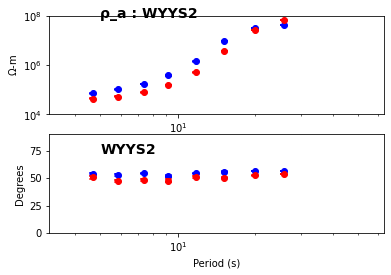

DECIMATION LEVEL 1
DATASET DF UPDATED
Processing band 102.915872s
Processing band 85.631182s
Processing band 68.881694s
Processing band 54.195827s
Processing band 43.003958s
Processing band 33.310722s


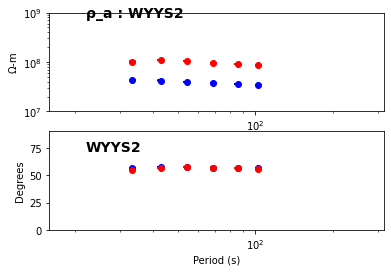

DECIMATION LEVEL 2
DATASET DF UPDATED
Processing band 411.663489s
Processing band 342.524727s
Processing band 275.526776s
Processing band 216.783308s
Processing band 172.015831s
Processing band 133.242890s


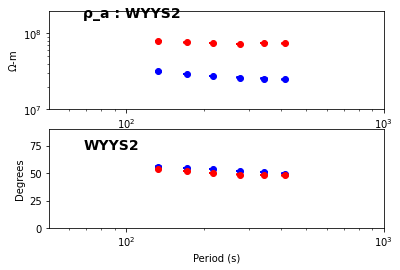

DECIMATION LEVEL 3
DATASET DF UPDATED
Processing band 1514.701336s
Processing band 1042.488956s
Processing band 723.371271s
Processing band 532.971560s
Processing band 412.837995s


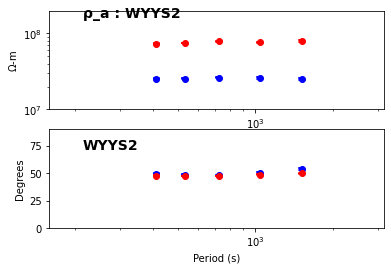

2022-10-16 13:19:24,619 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5


In [20]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

## There are some issues with these results:

1. The values in Ohmm are too large
2. The short period response does not look correct.

This could point at an issue with the filters, or calibration coefficients.

At the end of this notebook are some cells with debugging steps for investigating the filters.

However, the odd response at high frequency could be due to local noise.

Perhaps remote reference processing may help.

Inspecting the RunSummary, we see that station "MTF20" was operating simultaneously with "WYYS2".

Before invetigating the filters, it would be a good idea to run the same processing but with RR.  

It may also be a good idea to process WYYS3 to see if the same issues are there.

## Re-define the Kernel Dataset to do Remote Reference Processing:

In [21]:
local_station_id = "WYYS2"
reference_station_id = "MTF20"
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
kernel_dataset.drop_runs_shorter_than(10000)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,Kansas 2017 Long Period,WYYS2,002,2009-07-15 23:39:07+00:00,2009-07-31 19:39:02+00:00,1367995.0
1,Kansas 2017 Long Period,MTF20,002,2009-07-15 23:39:07+00:00,2009-07-31 19:39:02+00:00,1367995.0
2,Kansas 2017 Long Period,WYYS2,002,2009-07-31 20:47:27+00:00,2009-08-05 19:09:40+00:00,426133.0
3,Kansas 2017 Long Period,MTF20,003,2009-07-31 20:47:27+00:00,2009-08-05 19:09:40+00:00,426133.0
4,Kansas 2017 Long Period,WYYS2,003,2009-08-05 19:49:51+00:00,2009-08-13 00:00:01+00:00,619810.0
5,Kansas 2017 Long Period,MTF20,003,2009-08-05 19:49:51+00:00,2009-08-13 00:00:01+00:00,619810.0


In [22]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


In [23]:
for decimation in config.decimations:
    decimation.window.type = "hamming"

DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED
Processing band 25.728968s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing band 19.929573s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing 

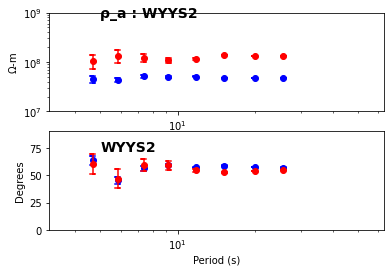

DECIMATION LEVEL 1
DATASET DF UPDATED
Processing band 102.915872s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Processing band 85.631182s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Processing band 68.881694s
Coordinate alignment mismatch -- s

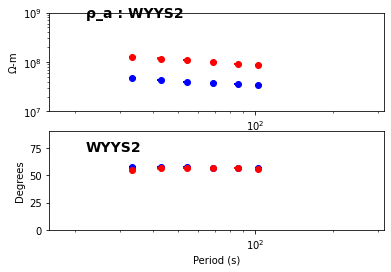

DECIMATION LEVEL 2
DATASET DF UPDATED
Processing band 411.663489s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Processing band 342.524727s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Processing band 275.526776s
Coordinate alignment mismatch --

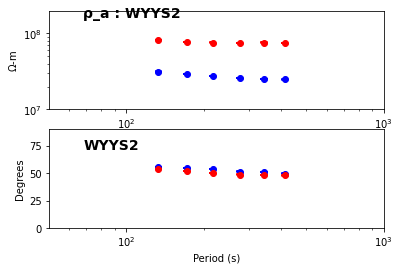

DECIMATION LEVEL 3
DATASET DF UPDATED
Processing band 1514.701336s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing band 1042.488956s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing band 723.371271s
Coordinate alignment mismatch 

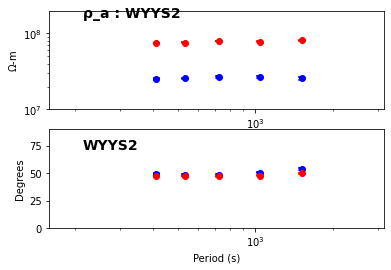

2022-10-16 13:24:41,395 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5
2022-10-16 13:24:41,606 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5


In [24]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

Wow! That's a big improvement with regard to wacky values at short period.

What's with all those error messages?

This is because there are ocassionally offsets in the coordinates.

From what I can tell these are basically on the order nanosecond offsets but more diagnostic error messages are in development.

In future, this will be handled by a system of "checks" in KernelDataset

## What about the scale factor issue?

Anticipating that the ability to scale data may be relevant to debugging, the KernelDataset provides an interface for ad-hoc (frequency independent) scale factors.

This is a dictionary, packed with each _Run_, for example:

In [25]:
kernel_dataset.df.iloc[0].channel_scale_factors

{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, 'hz': 1.0}

So we can grab a copy of this dictionary:

In [26]:
scale_factor = kernel_dataset.df.iloc[0].channel_scale_factors

And tweak it

In [27]:
scale_factor["ex"] /= 700
scale_factor["ey"] /= 700
scale_factor

{'ex': 0.0014285714285714286,
 'ey': 0.0014285714285714286,
 'hx': 1.0,
 'hy': 1.0,
 'hz': 1.0}

In [29]:
local_station_id = "WYYS2"
reference_station_id = "MTF20"
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
kernel_dataset.drop_runs_shorter_than(10000)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,Kansas 2017 Long Period,WYYS2,002,2009-07-15 23:39:07+00:00,2009-07-31 19:39:02+00:00,1367995.0
1,Kansas 2017 Long Period,MTF20,002,2009-07-15 23:39:07+00:00,2009-07-31 19:39:02+00:00,1367995.0
2,Kansas 2017 Long Period,WYYS2,002,2009-07-31 20:47:27+00:00,2009-08-05 19:09:40+00:00,426133.0
3,Kansas 2017 Long Period,MTF20,003,2009-07-31 20:47:27+00:00,2009-08-05 19:09:40+00:00,426133.0
4,Kansas 2017 Long Period,WYYS2,003,2009-08-05 19:49:51+00:00,2009-08-13 00:00:01+00:00,619810.0
5,Kansas 2017 Long Period,MTF20,003,2009-08-05 19:49:51+00:00,2009-08-13 00:00:01+00:00,619810.0


And assign to the dataframe

In [30]:
kernel_dataset.df.channel_scale_factors = len(kernel_dataset.df) * [scale_factor]
kernel_dataset.df

,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,mth5_path,duration,remote
0,Kansas 2017 Long Period,WYYS2,002,2009-07-15 23:39:07+00:00,2009-07-31 19:39:02+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,1367995.0,False
1,Kansas 2017 Long Period,MTF20,002,2009-07-15 23:39:07+00:00,2009-07-31 19:39:02+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,1367995.0,True
2,Kansas 2017 Long Period,WYYS2,002,2009-07-31 20:47:27+00:00,2009-08-05 19:09:40+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,426133.0,False
3,Kansas 2017 Long Period,MTF20,003,2009-07-31 20:47:27+00:00,2009-08-05 19:09:40+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,426133.0,True
4,Kansas 2017 Long Period,WYYS2,003,2009-08-05 19:49:51+00:00,2009-08-13 00:00:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,619810.0,False
5,Kansas 2017 Long Period,MTF20,003,2009-08-05 19:49:51+00:00,2009-08-13 00:00:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,619810.0,True


## Rinse and repeat
- regenerate the processing configuration
- call process_mth5

In [32]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)
for decimation in config.decimations:
    print(decimation.estimator.engine)
    decimation.window.type = "hamming"

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK
RME_RR
RME_RR
RME_RR
RME_RR


DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED
Processing band 25.728968s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing band 19.929573s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing 

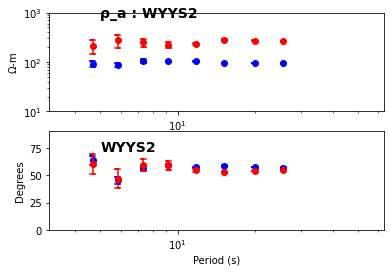

DECIMATION LEVEL 1
DATASET DF UPDATED
Processing band 102.915872s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Processing band 85.631182s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:45:31.000280702
RR.time.[0]: 2009-07-15T23:45:31.000280702
Processing band 68.881694s
Coordinate alignment mismatch -- s

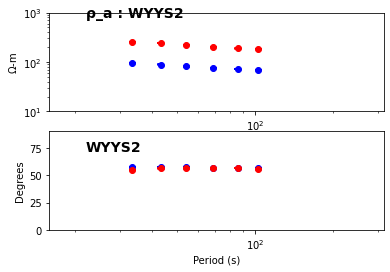

DECIMATION LEVEL 2
DATASET DF UPDATED
Processing band 411.663489s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Processing band 342.524727s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-16T00:04:43.001122811
RR.time.[0]: 2009-07-16T00:04:43.001122811
Processing band 275.526776s
Coordinate alignment mismatch --

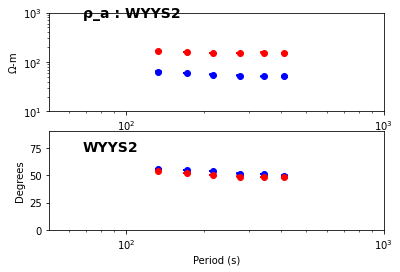

DECIMATION LEVEL 3
DATASET DF UPDATED
Processing band 1514.701336s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing band 1042.488956s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-07-15T23:39:07.000000000
RR.time.[0]: 2009-07-15T23:39:07.000000000
Processing band 723.371271s
Coordinate alignment mismatch 

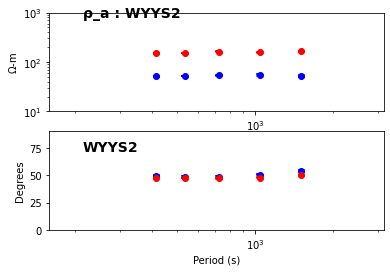

2022-10-16 13:57:42,793 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5
2022-10-16 13:57:43,042 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5


In [33]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

These results are much closer to the published values.  

The shape of the curves agrees with the published values, 
but the amplitudes are still a little high.

This suggests that we need to look carefully at the filters, and that there is a missing scale factor.

## Below: Same exercise but for WYYS3 (paired with MTC20)

## Re-define the Kernel Dataset:

In [34]:
local_station_id = "WYYS3"
reference_station_id = None# "MTC20"
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
kernel_dataset.drop_runs_shorter_than(10000)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,Kansas 2017 Long Period,WYYS3,001,2009-08-20 01:55:41+00:00,2009-08-28 17:23:46+00:00,746885.0
1,Kansas 2017 Long Period,WYYS3,002,2009-08-28 18:24:55+00:00,2009-09-09 20:39:01+00:00,1044846.0
2,Kansas 2017 Long Period,WYYS3,004,2009-09-09 21:01:11+00:00,2009-09-17 00:00:01+00:00,615530.0


In [35]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


In [36]:
for decimation in config.decimations:
    decimation.estimator.engine = "RME"
    decimation.window.type = "hamming"

DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED
Processing band 25.728968s
Processing band 19.929573s
Processing band 15.164131s
Processing band 11.746086s
Processing band 9.195791s
Processing band 7.362526s
Processing band 5.856115s
Processing band 4.682492s


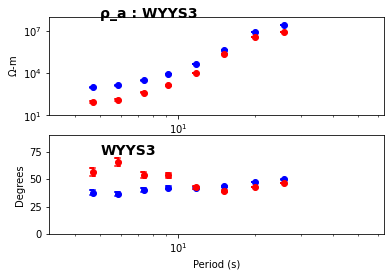

DECIMATION LEVEL 1
DATASET DF UPDATED
Processing band 102.915872s
Processing band 85.631182s
Processing band 68.881694s
Processing band 54.195827s
Processing band 43.003958s
Processing band 33.310722s


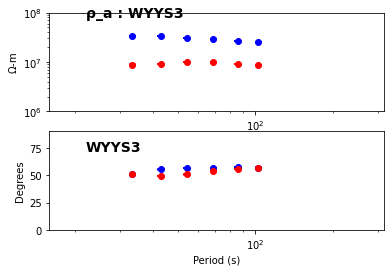

DECIMATION LEVEL 2
DATASET DF UPDATED
Processing band 411.663489s
Processing band 342.524727s
Processing band 275.526776s
Processing band 216.783308s
Processing band 172.015831s
Processing band 133.242890s


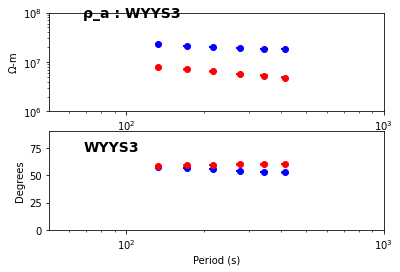

DECIMATION LEVEL 3
DATASET DF UPDATED
Processing band 1514.701336s
Processing band 1042.488956s
Processing band 723.371271s
Processing band 532.971560s
Processing band 412.837995s


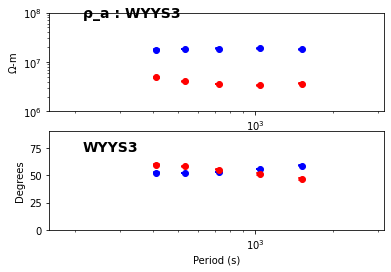

2022-10-16 14:04:15,624 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5


In [37]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

Same story as WYSS2.  Here we see WYSS3 has extreme bias at short period, and the same scale factor seems to be present.

## Add RR Processing and scale factor:

In [38]:
local_station_id = "WYYS3"
reference_station_id = "MTC20"
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
kernel_dataset.drop_runs_shorter_than(10000)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,Kansas 2017 Long Period,WYYS3,001,2009-08-23 01:33:26+00:00,2009-08-28 17:23:46+00:00,489020.0
1,Kansas 2017 Long Period,MTC20,002,2009-08-23 01:33:26+00:00,2009-08-28 17:23:46+00:00,489020.0
2,Kansas 2017 Long Period,WYYS3,002,2009-08-28 18:24:55+00:00,2009-09-01 18:50:08+00:00,347113.0
3,Kansas 2017 Long Period,MTC20,002,2009-08-28 18:24:55+00:00,2009-09-01 18:50:08+00:00,347113.0
4,Kansas 2017 Long Period,WYYS3,002,2009-09-01 19:06:56+00:00,2009-09-09 20:39:01+00:00,696725.0
5,Kansas 2017 Long Period,MTC20,003,2009-09-01 19:06:56+00:00,2009-09-09 20:39:01+00:00,696725.0
6,Kansas 2017 Long Period,WYYS3,004,2009-09-09 21:01:11+00:00,2009-09-13 00:00:01+00:00,269930.0
7,Kansas 2017 Long Period,MTC20,003,2009-09-09 21:01:11+00:00,2009-09-13 00:00:01+00:00,269930.0


Apply emprical scale factor

In [39]:
kernel_dataset.df.channel_scale_factors = len(kernel_dataset.df) * [scale_factor]
kernel_dataset.df

,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,mth5_path,duration,remote
0,Kansas 2017 Long Period,WYYS3,001,2009-08-23 01:33:26+00:00,2009-08-28 17:23:46+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,489020.0,False
1,Kansas 2017 Long Period,MTC20,002,2009-08-23 01:33:26+00:00,2009-08-28 17:23:46+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,489020.0,True
2,Kansas 2017 Long Period,WYYS3,002,2009-08-28 18:24:55+00:00,2009-09-01 18:50:08+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,347113.0,False
3,Kansas 2017 Long Period,MTC20,002,2009-08-28 18:24:55+00:00,2009-09-01 18:50:08+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,347113.0,True
4,Kansas 2017 Long Period,WYYS3,002,2009-09-01 19:06:56+00:00,2009-09-09 20:39:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,696725.0,False
5,Kansas 2017 Long Period,MTC20,003,2009-09-01 19:06:56+00:00,2009-09-09 20:39:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,696725.0,True
6,Kansas 2017 Long Period,WYYS3,004,2009-09-09 21:01:11+00:00,2009-09-13 00:00:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,269930.0,False
7,Kansas 2017 Long Period,MTC20,003,2009-09-09 21:01:11+00:00,2009-09-13 00:00:01+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 0.0014285714285714286, 'ey': 0.00142857...",../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5,269930.0,True


Then regenerate the processing configuration:

In [40]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)
for decimation in config.decimations:
    decimation.estimator.engine = "RME_RR"
    decimation.window.type = "hamming"

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


And re-process the data:

DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED
Processing band 25.728968s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:35:02.000196311
RR.time.[0]: 2009-08-23T01:35:02.000196310
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:35:02.000196311
RR.time.[0]: 2009-08-23T01:35:02.000196310
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:35:02.000196311
RR.time.[0]: 2009-08-23T01:35:02.000196310
Processing band 19.929573s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:35:02.000196311
RR.time.[0]: 2009-08-23T01:35:02.000196310
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:35:02.000196311
RR.time.[0]: 2009-08-23T01:35:02.000196310
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:35:02.000196311
RR.time.[0]: 2009-08-23T01:35:02.000196310
Processing 

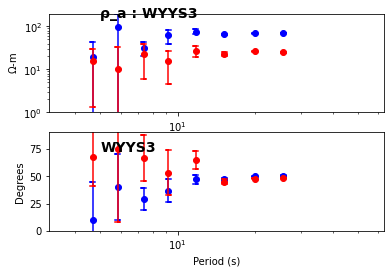

DECIMATION LEVEL 1
DATASET DF UPDATED
Processing band 102.915872s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:39:50.000785245
RR.time.[0]: 2009-08-23T01:39:50.000785243
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:39:50.000785245
RR.time.[0]: 2009-08-23T01:39:50.000785243
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:39:50.000785245
RR.time.[0]: 2009-08-23T01:39:50.000785243
Processing band 85.631182s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:39:50.000785245
RR.time.[0]: 2009-08-23T01:39:50.000785243
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:39:50.000785245
RR.time.[0]: 2009-08-23T01:39:50.000785243
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:39:50.000785245
RR.time.[0]: 2009-08-23T01:39:50.000785243
Processing band 68.881694s
Coordinate alignment mismatch -- s

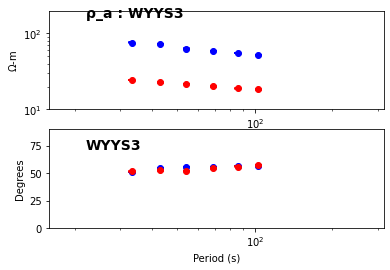

DECIMATION LEVEL 2
DATASET DF UPDATED
Processing band 411.663489s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:59:02.003140982
RR.time.[0]: 2009-08-23T01:59:02.003140975
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:59:02.003140982
RR.time.[0]: 2009-08-23T01:59:02.003140975
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:59:02.003140982
RR.time.[0]: 2009-08-23T01:59:02.003140975
Processing band 342.524727s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:59:02.003140982
RR.time.[0]: 2009-08-23T01:59:02.003140975
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:59:02.003140982
RR.time.[0]: 2009-08-23T01:59:02.003140975
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T01:59:02.003140982
RR.time.[0]: 2009-08-23T01:59:02.003140975
Processing band 275.526776s
Coordinate alignment mismatch --

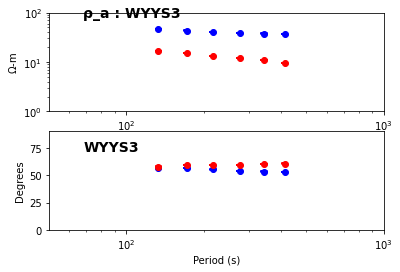

DECIMATION LEVEL 3
DATASET DF UPDATED
Processing band 1514.701336s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T03:15:50.012563929
RR.time.[0]: 2009-08-23T03:15:50.012563903
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T03:15:50.012563929
RR.time.[0]: 2009-08-23T03:15:50.012563903
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T03:15:50.012563929
RR.time.[0]: 2009-08-23T03:15:50.012563903
Processing band 1042.488956s
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T03:15:50.012563929
RR.time.[0]: 2009-08-23T03:15:50.012563903
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T03:15:50.012563929
RR.time.[0]: 2009-08-23T03:15:50.012563903
Coordinate alignment mismatch -- see aurora issue #228 
X.time.[0]: 2009-08-23T03:15:50.012563929
RR.time.[0]: 2009-08-23T03:15:50.012563903
Processing band 723.371271s
Coordinate alignment mismatch 

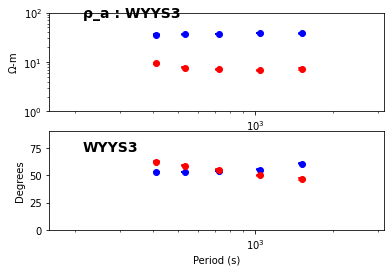

2022-10-16 14:14:28,698 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5
2022-10-16 14:14:28,924 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5


In [41]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

In [43]:
mth5_object.close_mth5()

2022-10-16 14:15:51,028 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing ../mth5/EM_WYYS2_MTF20_WYYS3_MTC20.h5


# Reviewing Filters (Debugging)

In [44]:
mth5_object = initialize_mth5(mth5_path)
mth5_object

/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
            |- Group: Kansas_2017_Long_Period
            ---------------------------------
                |- Group: Filters
                -----------------
                    |- Group: coefficient
                    ---------------------
                        |- Group: coefficient_00
                        ------------------------
                    |- Group: fap
                    -------------
                    |- Group: fir
                    -------------
                    |- Group: time_delay
                    --------------------
                    |- Group: zpk
                    -------------
                        |- Group: zpk_00
                        ----------------
         

## To access a particular channel from a station-run:

In [45]:
station_id = "WYYS2" #"MTC20" # "WYYS2"
run_id = "002" # "002"
survey = "Kansas_2017_Long_Period"
ex = mth5_object.get_channel(station_id, run_id, "ex", survey=survey)

To look at the filter info:

In [47]:
ex.metadata.filter

{
    "filtered": {
        "applied": [
            false,
            false
        ],
        "name": [
            "coefficient_00",
            "zpk_01"
        ]
    }
}

To access the time series (and its metadata):

In [48]:
ex_ts = ex.to_channel_ts()

In [49]:
ex_ts

Channel Summary:
	Station:      WYYS2
	Run:          002
	Channel Type: electric
	Component:    ex
	Sample Rate:  1.0
	Start:        2009-07-15T23:39:07+00:00
	End:          2009-08-05T19:09:40+00:00
	N Samples:    1798233

In [50]:
ex_ts.channel_metadata

{
    "electric": {
        "channel_number": 0,
        "comments": "run_ids: []",
        "component": "ex",
        "data_quality.rating.value": 0,
        "dipole_length": null,
        "filter.applied": [
            false,
            false
        ],
        "filter.name": [
            "coefficient_00",
            "zpk_01"
        ],
        "hdf5_reference": "<HDF5 object reference>",
        "measurement_azimuth": 13.5,
        "measurement_tilt": 0.0,
        "mth5_type": "Electric",
        "negative.elevation": 2392.0,
        "negative.id": null,
        "negative.latitude": 44.3964,
        "negative.longitude": -110.577003,
        "negative.manufacturer": null,
        "negative.type": null,
        "positive.elevation": 2392.0,
        "positive.id": null,
        "positive.latitude": 44.3964,
        "positive.longitude": -110.577003,
        "positive.manufacturer": null,
        "positive.type": null,
        "sample_rate": 1.0,
        "time_period.end": "2009-08

More information about channel specific filters

In [51]:
ex_ts.channel_response_filter

Filters Included:
coefficient_filter:
	calibration_date = 1980-01-01
	gain = 100.0
	name = coefficient_00
	type = coefficient
	units_in = V/m
	units_out = V
--------------------
pole_zero_filter:
	calibration_date = 1980-01-01
	gain = 409599000.0
	name = zpk_01
	normalization_factor = 313384.0
	poles = [ -3.88301+11.9519j   -3.88301-11.9519j  -10.16620 +7.38651j
 -10.16620 -7.38651j -12.56640 +0.j     ]
	type = zpk
	units_in = V
	units_out = count
	zeros = []
--------------------

To access another channel:

In [52]:
hx = mth5_object.get_channel("WYYS2", "002", "hx", survey="Kansas_2017_Long_Period")

In [53]:
hx.metadata.filter

{
    "filtered": {
        "applied": [
            false
        ],
        "name": [
            "zpk_00"
        ]
    }
}

In [54]:
hx_ts = hx.to_channel_ts()

In [55]:
hx_ts.channel_metadata

{
    "magnetic": {
        "channel_number": 0,
        "comments": "run_ids: []",
        "component": "hx",
        "data_quality.rating.value": 0,
        "filter.applied": [
            false
        ],
        "filter.name": [
            "zpk_00"
        ],
        "hdf5_reference": "<HDF5 object reference>",
        "location.elevation": 2392.0,
        "location.latitude": 44.3964,
        "location.longitude": -110.577003,
        "measurement_azimuth": 13.5,
        "measurement_tilt": 0.0,
        "mth5_type": "Magnetic",
        "sample_rate": 1.0,
        "sensor.id": null,
        "sensor.manufacturer": null,
        "sensor.type": null,
        "time_period.end": "2009-08-05T19:09:40+00:00",
        "time_period.start": "2009-07-15T23:39:07+00:00",
        "type": "magnetic",
        "units": "Digital Counts"
    }
}

In [56]:
survey = mth5_object.get_survey("Kansas_2017_Long_Period")

In [57]:
survey.filters_group

/Experiment/Surveys/Kansas_2017_Long_Period/Filters:
    |- Group: coefficient
    ---------------------
        |- Group: coefficient_00
        ------------------------
    |- Group: fap
    -------------
    |- Group: fir
    -------------
    |- Group: time_delay
    --------------------
    |- Group: zpk
    -------------
        |- Group: zpk_00
        ----------------
            --> Dataset: poles
            ....................
            --> Dataset: zeros
            ....................
        |- Group: zpk_01
        ----------------
            --> Dataset: poles
            ....................
            --> Dataset: zeros
            ....................

In [58]:

survey.filters_group.coefficient_group

/Experiment/Surveys/Kansas_2017_Long_Period/Filters/coefficient:
    |- Group: coefficient_00
    ------------------------

In [59]:
survey.filters_group.coefficient_group.filter_dict

{'coefficient_00': {'type': 'coefficient',
  'hdf5_ref': <HDF5 object reference>}}

In [60]:
tmp = survey.filters_group.coefficient_group.filter_dict["coefficient_00"]

In [64]:
print(type(tmp))
tmp

<class 'dict'>


{'type': 'coefficient', 'hdf5_ref': <HDF5 object reference>}

In [65]:
tmp.keys()

dict_keys(['type', 'hdf5_ref'])